# 作業
### 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

載入 相關套件 並 執行 hierarchical clustering 實驗 ...

In [2]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(5)

%matplotlib inline

In [3]:
estimators = [('hc_ward', AgglomerativeClustering(n_clusters=3, linkage="ward")),
              ('hc_complete', AgglomerativeClustering(n_clusters=3, linkage="complete")),
              ('hc_average', AgglomerativeClustering(n_clusters=3, linkage="average"))]

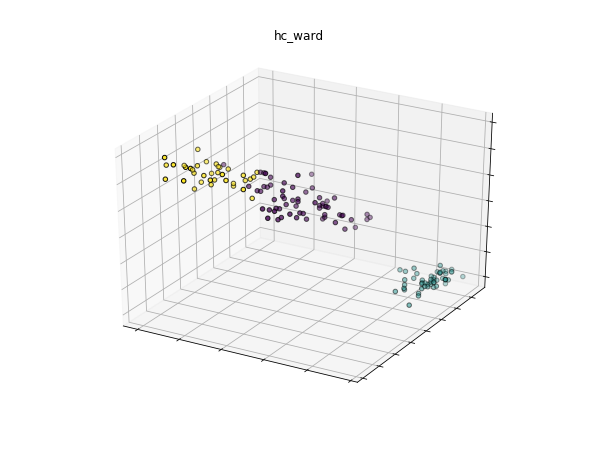

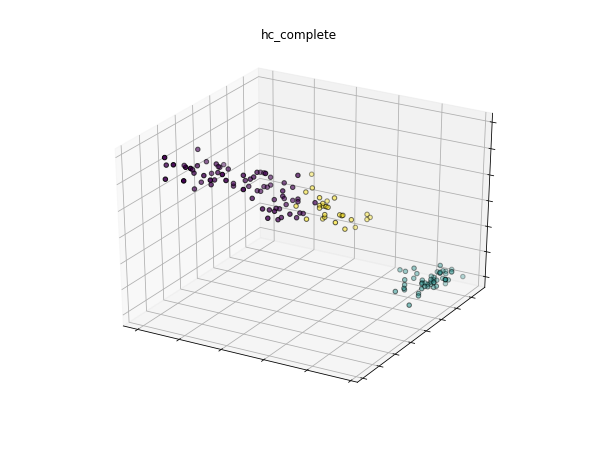

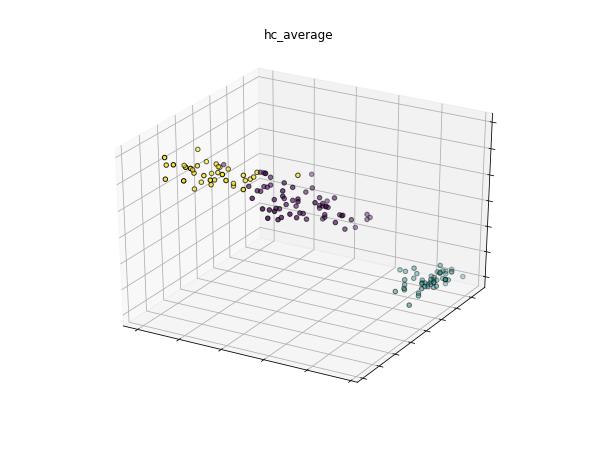

In [4]:
figNum = 1
titles = ['hc_ward', 'hc_complete', 'hc_average']

for name, est in estimators:
    # 決定畫布大小
    fig = plt.figure(figNum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, 2, 2], elev=30, azim=120)
    
    # Trainning Data
    est.fit(X)
    
    # 決定 title
    labels = est.labels_

    # 繪製圖形
    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[figNum - 1])
    
    # 決定格線距離
    ax.dist = 12
    
    figNum += 1

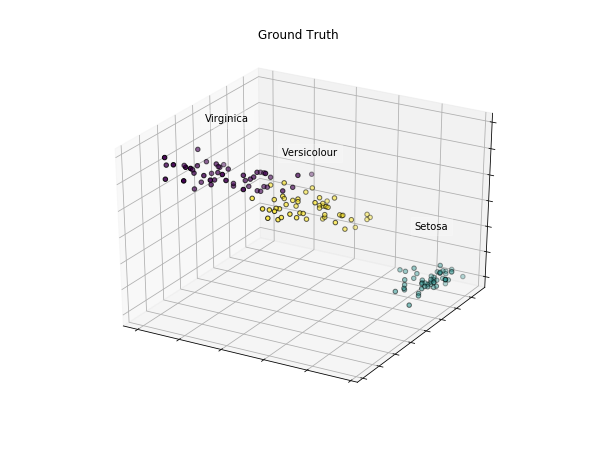

In [6]:
# Plot the ground truth
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, 2, 2], elev=30, azim=120)

namelist = [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]

for name, label in namelist:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

使用三種方法分析後，發現是 average 最貼近真實的情況。